Predicted values:
[4. 0. 2. 0. 0. 2. 3. 0. 5. 2. 0. 1. 0. 0. 2. 2. 4. 4. 0. 2. 6. 0. 4. 5.
 4. 5. 2. 0. 0. 2. 2. 5. 2. 1. 0. 0. 1. 3. 6. 4. 5. 2. 2. 4. 3. 3. 2. 2.]
Confusion Matrix:  [[12  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0]
 [ 0  1 11  0  3  0  1]
 [ 0  0  1  4  0  0  0]
 [ 0  0  2  0  4  0  1]
 [ 0  0  0  0  0  5  0]
 [ 1  0  0  0  0  0  0]]
Accuracy :  79.16666666666666
Report :                precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        12
         1.0       0.67      1.00      0.80         2
         2.0       0.79      0.69      0.73        16
         3.0       1.00      0.80      0.89         5
         4.0       0.57      0.57      0.57         7
         5.0       1.00      1.00      1.00         5
         6.0       0.00      0.00      0.00         1

    accuracy                           0.79        48
   macro avg       0.71      0.72      0.71        48
weighted avg       0.81      0.79      0.80        48



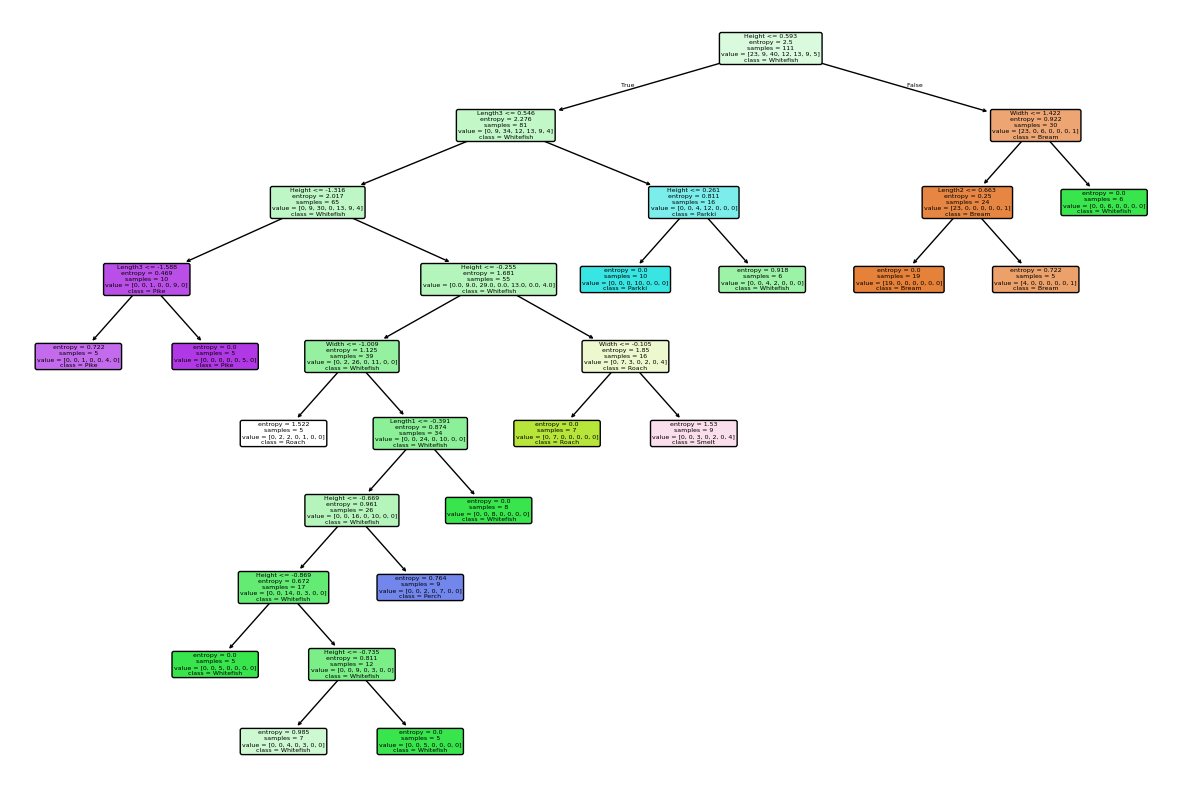

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree # Import plot_tree

ds = pd.read_csv('/content/Fish.csv')
label_encoder = preprocessing.LabelEncoder()
ds['Species']= label_encoder.fit_transform(ds['Species'])
ds['Species'].unique()
scaler = StandardScaler()
scaler.fit(ds[ds.columns[1:7]])
scaled_features = scaler.transform(ds[ds.columns[1:7]])
ds_scaled = pd.concat([ds[['Species']], pd.DataFrame(scaled_features, columns=ds.columns[1:7])], axis=1)

def splitdataset(ds):
  X = ds_scaled.values[:, 1:7]
  Y = ds_scaled.values[:,0]
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)
  return X, Y, X_train, X_test, y_train, y_test

def train_using_entropy(X_train, X_test, y_train):
    clf_entropy = DecisionTreeClassifier(
    criterion="entropy", random_state=100, min_samples_leaf=5)
    clf_entropy.fit(X_train, y_train)
    return clf_entropy

# Function to make predictions
def prediction(X_test, clf_object):
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred

# Placeholder function for cal_accuracy
def cal_accuracy(y_test, y_pred):
    print("Confusion Matrix: ",
          confusion_matrix(y_test, y_pred))
    print("Accuracy : ",
          accuracy_score(y_test, y_pred)*100)
    print("Report : ",
          classification_report(y_test, y_pred))
def plot_decision_tree(clf_object, feature_names, class_names):
    plt.figure(figsize=(15, 10))
    plot_tree(clf_object, filled=True, feature_names=feature_names, class_names=class_names, rounded=True)
    plt.show()

if __name__ == "__main__":
    data = ds_scaled
    X, Y, X_train, X_test, y_train, y_test = splitdataset(data)

    clf_entropy = train_using_entropy(X_train, X_test, y_train)
    y_pred_entropy = prediction(X_test, clf_entropy)
    cal_accuracy(y_test, y_pred_entropy)

    # Visualizing the Decision Trees
    feature_names = ds_scaled.columns[1:7]
    class_names =['Bream' , 'Roach' , 'Whitefish', 'Parkki' , 'Perch' , 'Pike' , 'Smelt']
    plot_decision_tree(clf_entropy, feature_names, class_names)

In [61]:
results_df = pd.DataFrame({
    'Predicted': y_pred_entropy
})

species_names = ['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt']
results_df['Predicted'] = results_df['Predicted'].astype(int).map(lambda x: species_names[x])

results_df.to_csv('preiction_decision_tree.csv', index=False)
print("✅ تم حفظ النتائج في ملف ")


✅ تم حفظ النتائج في ملف 


bold text